In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars, MultiTaskLasso, Lasso, ElasticNet, Ridge

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [16]:
def corr(x_data, y_data):
    pairedScores = 0
    for i in range(len(x_data)):
        pairedScores += (x_data[i]*y_data[i])
    sumX = 0
    for i in range(len(x_data)):
        sumX += x_data[i]
    sumY = 0
    for i in range(len(x_data)):
        sumY += y_data[i]
    top = (len(x_data)*pairedScores) - (sumX*sumY)

    varx = 0
    for i in range(len(x_data)):
        varx += len(x_data)*((x_data[i])**2)
    varx -= (sumX)**2
    vary = 0
    for i in range(len(x_data)):
        vary += len(x_data)*((y_data[i])**2)
    vary -= (sumY)**2
    bottom = (varx*vary)**(0.5)

    r = top/bottom
    print("Pearson's correlation coefficient:", r)

In [17]:
def pcor(x_data, y_data):
    top = 0
    bottom = 0
    bottom_x = 0
    bottom_y = 0
    x_mean = sum(x_data)
    x_mean = x_mean/len(x_data)
    y_mean = sum(y_data)
    y_mean = y_mean/len(y_data)
    
    for i in range(len(x_data)):
        top += (x_data[i] - x_mean)*(y_data[i] - y_mean)
        
    for i in range(len(x_data)):
        bottom_x += ((x_data[i] - x_mean)**2)
        
    for i in range(len(y_data)):
        bottom_y += ((y_data[i] - y_mean)**2)
        
    bottom = (bottom_x * bottom_y)**0.5
    r = top/bottom
    print("Pearson's correlation coefficient:", r)

In [18]:
wnba = pd.read_csv('wnba-player-stats-final.csv')
GP = wnba['GP']
mins = wnba['Total Mins']
points = wnba['Total Points']
MPG = wnba['MPG']
PPG = wnba['PPG']
FGP = wnba['FG%']
GS = wnba['GS/GP']
salaries = wnba['Salaries']

data = wnba[['GP', 'Total Mins', 'Total Points', 'MPG', 'PPG', 'FG%', 'GS/GP']]
performance = wnba[['GS/GP', 'MPG', 'PPG', 'FG%']]

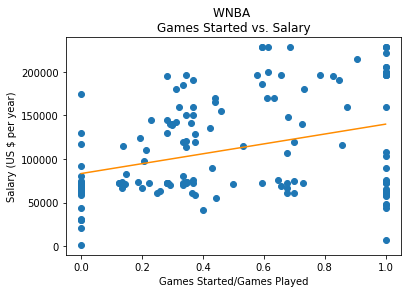

Pearson's correlation coefficient: 0.349840487358062


In [19]:
m, b = np.polyfit(GS, salaries, 1)

plt.scatter(GS, salaries)
plt.plot(GS, m*GS + b, color='darkorange')
plt.xlabel('Games Started/Games Played')
plt.ylabel('Salary (US $ per year)')
plt.title('WNBA \nGames Started vs. Salary')
plt.show()
corr(GS, salaries)

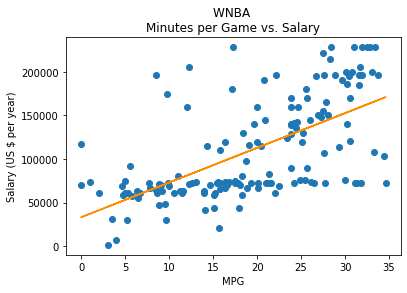

Pearson's correlation coefficient: 0.625832188713717


In [20]:
m, b = np.polyfit(MPG, salaries, 1)

plt.scatter(MPG, salaries)
plt.plot(MPG, m*MPG + b, color='darkorange')
plt.xlabel('MPG')
plt.ylabel('Salary (US $ per year)')
plt.title('WNBA \nMinutes per Game vs. Salary')
plt.show()
corr(MPG, salaries)

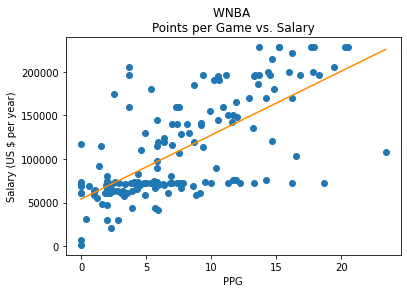

Pearson's correlation coefficient: 0.6820404890128169


In [21]:
m, b = np.polyfit(PPG, salaries, 1)

plt.scatter(PPG, salaries)
plt.plot(PPG, m*PPG + b, color='darkorange')
plt.xlabel('PPG')
plt.ylabel('Salary (US $ per year)')
plt.title('WNBA \nPoints per Game vs. Salary')
plt.show()
corr(PPG, salaries)

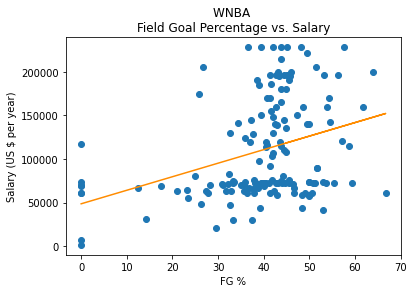

Pearson's correlation coefficient: 0.34531952907695157


In [22]:
m, b = np.polyfit(FGP, salaries, 1)

plt.scatter(FGP, salaries)
plt.plot(FGP, m*FGP + b, color='darkorange')
plt.xlabel('FG %')
plt.ylabel('Salary (US $ per year)')
plt.title('WNBA \nField Goal Percentage vs. Salary')
plt.show()
corr(FGP, salaries)

In [23]:
regr_final = LinearRegression()
regr_final.fit(performance, salaries)

print(regr_final.coef_)
print(regr_final.score(performance, salaries))
print(regr_final.intercept_)

[7112.71406503  582.98144705 6213.56125203   11.78594938]
0.4680246469672027
47499.285786249755


In [24]:
regr = Ridge()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[6685.18848416  581.79186209 6226.60489664   12.36197557]
0.4680192326713293
47601.99904802706


In [25]:
regr = TweedieRegressor()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[ 852.93819742  962.79497142 5617.29653353   30.71323609]
0.4655101170767332
46924.131244810895


In [26]:
regr = Lasso()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[7102.94296482  583.01009216 6213.79057508   11.78594551]
0.4680246440867595
47501.60143124318


In [27]:
regr = ElasticNet()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[1375.43205837  768.30163282 5993.79230889   24.01459792]
0.4666541549655072
47825.277198914046


In [28]:
regr = LassoLars()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[7088.10681553  582.42458984 6213.54158207   11.18936613]
0.4680245660087997
47545.45567438721


/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [29]:
salary_predictions = []
residuals = []
for i in range(len(wnba)):
    prediction = regr_final.predict([[GS[i], MPG[i], PPG[i], FGP[i]]])
    salary_predictions.append(prediction)
    
for i in range(len(salaries)):
    residuals.append(salaries[i] - salary_predictions[i])

/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-s

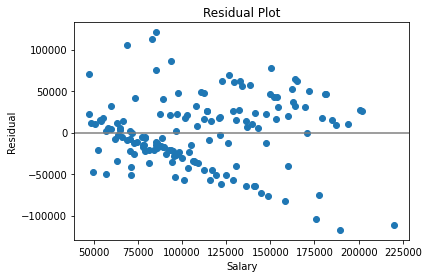

Pearson's correlation coefficient: [-2.42546768e-16]


In [30]:
plt.scatter(salary_predictions, residuals)
plt.axhline(0, color = 'gray')
#plt.grid(axis = 'y')
plt.xlabel('Salary')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()
corr(salary_predictions, residuals)

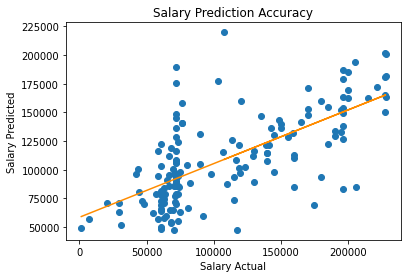

Pearson's correlation coefficient: [0.68412327]


In [31]:
m, b = np.polyfit(salaries, salary_predictions, 1)

plt.scatter(salaries, salary_predictions)
plt.plot(salaries, m*salaries + b, color='darkorange')
plt.xlabel('Salary Actual')
plt.ylabel('Salary Predicted')
plt.title('Salary Prediction Accuracy')
plt.show()
corr(salaries, salary_predictions)

In [58]:
x = performance
y = salaries

split_idx = int(0.9*x.shape[0])

x_wnba_train, y_wnba_train = x[:split_idx], y[:split_idx]
x_wnba_test, y_wnba_test = x[split_idx:], y[split_idx:]

#LinearRegression, TweedieRegressor, LassoLars, MultiTaskLasso, Lasso, ElasticNet, Ridge

model_logistic = TweedieRegressor()
model = model_logistic.fit(x_wnba_train, y_wnba_train)
model_logistic.score(x_wnba_test, y_wnba_test)

-0.24336771340737773

In [69]:
clf = SVC(kernel='linear', C=1).fit(x_wnba_train, y_wnba_train)
clf.score(x_wnba_test, y_wnba_test)

0.1366906474820144

In [33]:
print(sum(GS)/len(GS))
print(sum(MPG)/len(MPG))
print(sum(PPG)/len(PPG))
print(sum(FGP)/len(FGP))
print(sum(salaries)/len(salaries))

0.47279451125806454
19.31870967741936
7.634838709677421
39.6051612903226
110030.90967741936


In [34]:
len(salaries)

155